In [1]:
import pandas  as pd
import seaborn as sns

In [2]:
x= pd.read_excel("Data_Train.xlsx")


In [3]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
x.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
x.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [6]:
x.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
x.dropna(inplace=True)

In [8]:
x.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
x.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
x['Date_of_Journey']=pd.to_datetime(x['Date_of_Journey'])

In [11]:
x['Dep_Time']=pd.to_datetime(x['Dep_Time'])

In [12]:
x['Arrival_Time']=pd.to_datetime(x['Arrival_Time'])

In [13]:
x['Journey_day']=x['Date_of_Journey'].dt.day

In [14]:
x['Journey_Month']=x['Date_of_Journey'].dt.month

In [15]:
x.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_Month'],
      dtype='object')

In [17]:
x['Journey_Hour']= x['Dep_Time'].dt.hour

In [18]:
x['Journey_Minute']=x['Dep_Time'].dt.minute

In [19]:
x['Arrival_Hour']=x['Arrival_Time'].dt.hour

In [20]:
x['Arrival_Minute']=x['Arrival_Time'].dt.minute

In [21]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_Month', 'Journey_Hour', 'Journey_Minute', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

In [22]:
x['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Airline', ylabel='Price'>

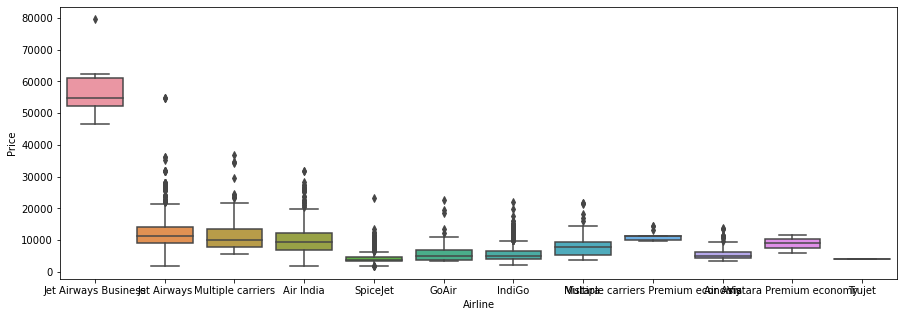

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=x.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

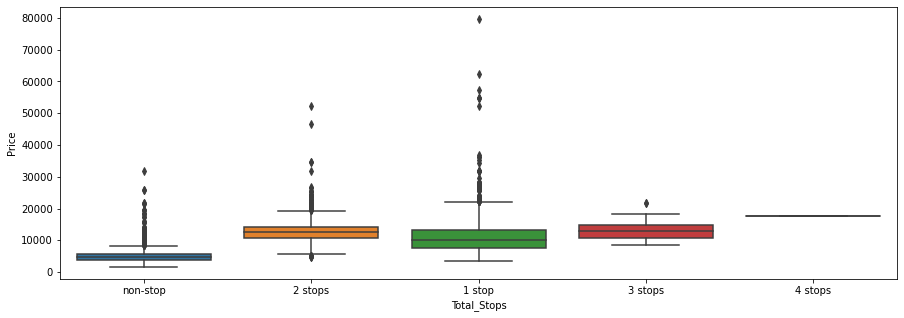

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=x)

In [26]:
Airline=pd.get_dummies(x['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
Source=pd.get_dummies(x['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
x['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Source'>

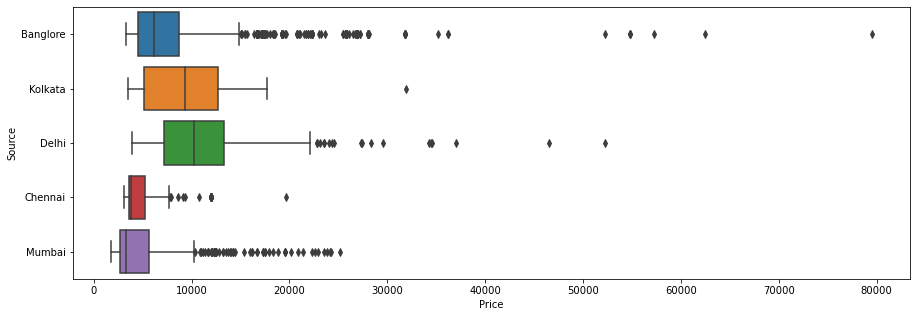

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Source',x='Price',data=x)

In [30]:
Destination=pd.get_dummies(x['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
x['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
x.drop('Additional_Info',axis=1,inplace= True)

In [33]:
x['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
x['Route_1']=x['Route'].str.split('→').str[0]
x['Route_2']=x['Route'].str.split('→').str[1]
x['Route_3']=x['Route'].str.split('→').str[2]
x['Route_4']=x['Route'].str.split('→').str[3]
x['Route_5']=x['Route'].str.split('→').str[4]

In [35]:
x['Route_1'].fillna('None',inplace=True)
x['Route_2'].fillna('None',inplace=True)
x['Route_3'].fillna('None',inplace=True)
x['Route_4'].fillna('None',inplace=True)
x['Route_5'].fillna('None',inplace=True)

In [36]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_Month',
       'Journey_Hour', 'Journey_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder=LabelEncoder()

In [39]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    x[i]=encoder.fit_transform(x[i])

In [40]:
x['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [42]:
x['Total_Stops']=x['Total_Stops'].map(dic)

In [43]:
x.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,19h,2,13882,6,9,9,25,4,25,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,5h 25m,1,6218,5,12,18,5,23,30,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,4h 45m,1,13302,3,1,16,50,21,35,0,34,8,13,5


In [44]:
duration=list(x['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h'in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [45]:
x['Duration']=duration

In [46]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [47]:
def hour(a):
    return a.split(' ')[0][0:-1]
def min(a):
    return a.split(' ')[1][0:-1]

In [48]:
x['Duration_hours']=x['Duration'].apply(hour)
x['Duration_mins']=x['Duration'].apply(min)

In [49]:
x['Duration_hours']=x['Duration_hours'].astype(int)
x['Duration_mins']=x['Duration_mins'].astype(int)

In [50]:
x.drop('Duration',axis=1,inplace=True)

In [51]:
x.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Total_Stops                int64
Price                      int64
Journey_day                int64
Journey_Month              int64
Journey_Hour               int64
Journey_Minute             int64
Arrival_Hour               int64
Arrival_Minute             int64
Route_1                    int32
Route_2                    int32
Route_3                    int32
Route_4                    int32
Route_5                    int32
Duration_hours             int32
Duration_mins              int32
dtype: object

In [52]:
x=pd.concat([x,Source,Airline,Destination],axis=1)

In [53]:
x.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_day,Journey_Month,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,...,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,...,0,0,0,0,0,0,0,0,0,1


In [54]:
pd.set_option('display.max_columns',35)

In [55]:
x.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_day,Journey_Month,Journey_Hour,Journey_Minute,Arrival_Hour,Arrival_Minute,Route_1,Route_2,Route_3,...,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-30 22:20:00,2022-03-22 01:10:00,0,3897,24,3,22,20,1,10,0,13,29,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-30 05:50:00,2022-04-30 13:15:00,2,7662,5,1,5,50,13,15,2,25,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-30 09:25:00,2022-06-10 04:25:00,2,13882,6,9,9,25,4,25,3,32,4,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-30 18:05:00,2022-04-30 23:30:00,1,6218,5,12,18,5,23,30,2,34,3,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-30 16:50:00,2022-04-30 21:35:00,1,13302,3,1,16,50,21,35,0,34,8,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
x.drop('Airline',axis=1,inplace=True)
x.drop('Source',axis=1,inplace=True)
x.drop('Destination',axis=1,inplace=True)
x.drop('Route',axis=1,inplace=True)
x.drop('Dep_Time',axis=1,inplace=True)
x.drop('Arrival_Time',axis=1,inplace=True)

In [63]:
x.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_Month', 'Journey_Hour',
       'Journey_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Duration_hours',
       'Duration_mins', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [66]:
b=x.drop('Price',axis=1)

In [67]:
c=x['Price']

In [68]:
from sklearn.feature_selection import mutual_info_classif

In [69]:
mutual_info_classif(b,c)

array([2.16341416, 1.06341985, 0.86207161, 1.43968403, 1.21586249,
       1.85909209, 1.51147621, 2.06101158, 2.78294733, 2.26973907,
       1.41231945, 0.73733641, 1.792045  , 1.08360794, 0.17044377,
       1.51719963, 0.88657546, 0.27711521, 0.77414376, 0.10703331,
       0.68756043, 0.91242642, 0.00877694, 0.55070305, 0.00829201,
       0.33749512, 0.        , 0.22392244, 0.00641164, 1.55344391,
       0.41784241, 0.27955931, 0.18128576, 0.37568814])

In [70]:
from sklearn.model_selection import train_test_split

In [73]:
b_train,b_test,c_train,c_test=train_test_split(b,c,test_size=0.2)

In [74]:
from sklearn import metrics
import numpy as np

In [78]:
def model(algo):
    my_model=algo.fit(b_train,c_train)
    print('train_score:',my_model.score(b_train,c_train))
    c_pred=my_model.predict(b_test)
    r2_score=metrics.r2_score(c_test,c_pred)
    print('r2_score:',r2_score)
    mae=metrics.mean_absolute_error(c_test,c_pred)
    print('Mean absolute error',mae)
    rmse=np.sqrt(metrics.mean_squared_error(c_test,c_pred))
    print('RMSE:',rmse)
    sns.distplot(c_test-c_pred)

In [80]:
from sklearn.linear_model import LinearRegression

C:\Users\ANNAREDDY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


train_score: 0.63468275268781
r2_score: 0.5964972150649135
Mean absolute error 1988.9400104382244
RMSE: 2761.362005154811


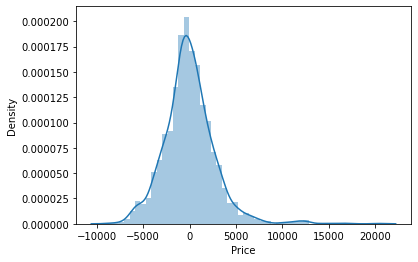

In [84]:
model(LinearRegression())

In [89]:
from sklearn.tree import DecisionTreeRegressor

train_score: 0.9714052233461189
r2_score: 0.5551684524385714
Mean absolute error 1299.4395960068632
RMSE: 2899.33145068144


C:\Users\ANNAREDDY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


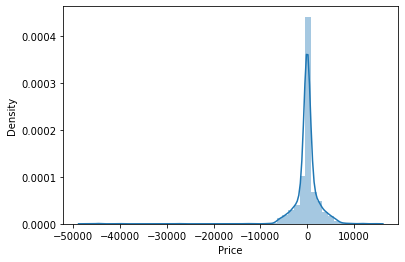

In [90]:
model(DecisionTreeRegressor())

In [92]:
from sklearn.linear_model import LogesticRegression

ImportError: cannot import name 'LogesticRegression' from 'sklearn.linear_model' (C:\Users\ANNAREDDY\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)